In [1]:
import math

# Assigment 1 forwad pass and backpropagation without using any library

x = [1,-1]
t = [1,0]

w = [[1,1,1],[-1,-1,-1]]
b = [0,0,0]

v = [[1,1],[-1,-1],[-1,-1]]
c = [0,0]

## Forward pass

In [2]:


print(f"x: {x}")

# first layer
print(f"W: {w}")

k = [sum([x[i]*w[i][j] for i in range(len(x))]) + b[j] for j in range(len(b))]

print(f"k: {k}")

# sigmoid layer
z = [1/(1+math.exp(-k[i])) for i in range(len(k))]

print(f"z: {z}")

# second layer
print(f"V: {v}")

o = [sum([z[i]*v[i][j] for i in range(len(z))]) + c[j] for j in range(len(c))]

print(f"o: {o}")

# softmax layer
y = [math.exp(o[i])/sum([math.exp(o[j]) for j in range(len(o))]) for i in range(len(o))]

print(f"y: {y}")

# cross entropy loss
loss = -sum([t[i]*math.log(y[i]) for i in range(len(t))])

print(f"loss: {loss}")


x: [1, -1]
W: [[1, 1, 1], [-1, -1, -1]]
k: [2, 2, 2]
z: [0.8807970779778823, 0.8807970779778823, 0.8807970779778823]
V: [[1, 1], [-1, -1], [-1, -1]]
o: [-0.8807970779778823, -0.8807970779778823]
y: [0.5, 0.5]
loss: 0.6931471805599453


## Backward pass

In [3]:
# derivative of loss function with respect to yi
dy = [(-1/y[i])*t[i] for i in range(len(y))]

print(f"dy: {dy}")

# derivative of loss function with respect to oi
do = [sum([dy[j] * (y[i]*(1-y[i]) if j==i else -y[j]*y[i]) for j in range(len(dy))]) for i in range(len(o))]

# alternative way to calculate do
#index of true class
i_true = t.index(1)
do_alt = [dy[i_true]  * (y[i]*(1-y[i]) if i==i_true else -y[i_true]*y[i]) for i in range(len(o))]

assert do == do_alt


print(f"do: {do}")

# derivative of loss function with respect to v
dv = [[do[j]*z[i] for j in range(len(do))] for i in range(len(z))]

print(f"dv: {dv}")

# derivative of loss function with respect to ci
dc = [do[i]  for i in range(len(c))]

print(f"dc: {dc}")

# derivative of loss function with respect to zi
dz = [sum([do[j]*v[i][j] for j in range(len(do))]) for i in range(len(v))]

print(f"dz: {dz}")

# derivative of loss function with respect to ki
dk = [dz[i]*z[i]*(1-z[i]) for i in range(len(z))]

print(f"dk: {dk}")

# derivative of loss function with respect to wi
dw = [[dk[j]*x[i] for j in range(len(dk))] for i in range(len(x))]

print(f"dw: {dw}")

# derivative of loss function with respect to bi
db = [dk[i] for i in range(len(b))]

print(f"db: {db}")

dy: [-2.0, -0.0]
do: [-0.5, 0.5]
dv: [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
dc: [-0.5, 0.5]
dz: [0.0, 0.0, 0.0]
dk: [0.0, 0.0, 0.0]
dw: [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
db: [0.0, 0.0, 0.0]


In [ ]:
import math

class SimpleNeuralNetwork:
    def __init__(self, w, b, v, c):
        # Initialize weights and biases
        self.w = w
        self.b = b
        self.v = v
        self.c = c
    

    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def forward_pass(self, x):
        # First layer
        k = [sum(x[i] * self.w[i][j] for i in range(len(x))) + self.b[j] for j in range(len(self.b))]
        # Sigmoid layer
        z = [self.sigmoid(k[i]) for i in range(len(k))]
        # Second layer
        o = [sum(z[i] * self.v[i][j] for i in range(len(z))) + self.c[j] for j in range(len(self.c))]
        # Softmax layer
        y = [math.exp(o[i]) / sum(math.exp(o[j]) for j in range(len(o))) for i in range(len(o))]
        return y, z, k, o

    def compute_loss(self, y, t):
        return -sum(t[i] * math.log(y[i]) for i in range(len(t)))

    def backward_pass(self,t, y, o, z, x):
        # Derivatives of the loss function
        # derivative of loss function with respect to yi
        dy = [(-t[i] / y[i]) for i in range(len(y))]

        # derivative of loss function with respect to oi
        do = [sum([dy[j] * (y[j]*(1-y[j]) if j==i else -y[j]*y[i]) for j in range(len(dy))]) for i in range(len(o))]
        #do = [dy[j] * (y[j]*(1-y[j]))  for j in range(len(dy))]) for i in range(len(o))]

        # derivative of loss function with respect to v
        dv = [[do[j]*z[i] for j in range(len(do))] for i in range(len(z))]

        # derivative of loss function with respect to ci
        dc = [do[i]  for i in range(len(c))]

        # derivative of loss function with respect to zi
        dz = [sum([do[j]*self.v[i][j] for j in range(len(do))]) for i in range(len(self.v))]

        # derivative of loss function with respect to ki
        dk = [dz[i]*z[i]*(1-z[i]) for i in range(len(z))]

        # derivative of loss function with respect to wi
        dw = [[dk[j]*x[i] for j in range(len(dk))] for i in range(len(x))]

        # derivative of loss function with respect to bi
        db = [dk[i] for i in range(len(b))]

        return dw, db, dc, dv
    def update_weights(self, dw, db,dc, dv, learning_rate=0.1):
        # Update the weights and biases using the learning rate
        for i in range(len(self.w)):
            for j in range(len(self.w[i])):
                self.w[i][j] -= learning_rate * dw[i][j]
        
        for i in range(len(self.b)):
            self.b[i] -= learning_rate * db[i]

        for i in range(len(self.v)):
            for j in range(len(self.v[i])):
                self.v[i][j] -= learning_rate * dv[i][j]

        for i in range(len(self.c)):
            self.c[i] -= learning_rate * dc[i]

    def train(self, xtrain, ytrain, epochs, learning_rate=0.1):

        epochs_loss = []
        for epoch in range(epochs):

            data_points_loss = []
            total_loss = 0
            for index,(x, t) in enumerate(zip(xtrain, ytrain)):# TODO: shuffle data
                y, z, k, o = self.forward_pass(x)
                loss = self.compute_loss(y, t)
                dw, db, dc, dv = self.backward_pass(t, y, o, z, x)
                # if is first run print derivative
                if epoch == 0 and index == 0:
                    print(f"dw: {dw}")
                    print(f"db: {db}")
                    print(f"dc: {dc}")
                    print(f"dv: {dv}")
                self.update_weights(dw, db, dc, dv, learning_rate=learning_rate)
                total_loss += loss
                data_points_loss.append(loss)
            avg_loss = total_loss / len(xtrain)
            print(f"Epoch {epoch + 1}, Average Loss: {avg_loss}")

            epochs_loss.append(data_points_loss)
        return epochs_loss
            
    def validate(self, xval, yval):
        total_loss = 0
        correct_predictions = 0
        for x, t in zip(xval, yval):
            y, _, _, _ = self.forward_pass(x)

            # Predicted class is the one with the highest probability
            predicted_class = y.index(max(y))

            # Actual class is the one with the highest value in the target vector
            actual_class = t.index(max(t))

            # Increment correct predictions if the classes match
            if predicted_class == actual_class:
                correct_predictions += 1

            loss = self.compute_loss(y, t)
            total_loss += loss

        avg_loss = total_loss / len(xval)
        accuracy = correct_predictions / len(xval)
        return avg_loss, accuracy

# Example usage
x = [[1, -1], [-1, 1]]
t = [[1, 0], [0, 1]]
w = [[1, 1, 1], [-1, -1, -1]]
b = [0, 0, 0]
v = [[1, 1], [-1, -1], [-1, -1]]
c = [0, 0]
nn = SimpleNeuralNetwork(w, b, v, c)
nn.train(x, t, 100)



dw: [[0.0, 0.0, 0.0], [-0.0, -0.0, -0.0]]
db: [0.0, 0.0, 0.0]
dc: [-0.5, 0.5]
dv: [[-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116], [-0.44039853898894116, 0.44039853898894116]]
Epoch 1, Average Loss: 0.7271016556975978
Epoch 2, Average Loss: 0.6833104722571401
Epoch 3, Average Loss: 0.6478012119807957
Epoch 4, Average Loss: 0.6179929318115058
Epoch 5, Average Loss: 0.5921725289488446
Epoch 6, Average Loss: 0.5692155385385275
Epoch 7, Average Loss: 0.5483821001909135
Epoch 8, Average Loss: 0.5291803634833332
Epoch 9, Average Loss: 0.51127833919219
Epoch 10, Average Loss: 0.49444772247397856
Epoch 11, Average Loss: 0.4785281028622107
Epoch 12, Average Loss: 0.4634040280354398
Epoch 13, Average Loss: 0.4489901738010207
Epoch 14, Average Loss: 0.43522165760908116
Epoch 15, Average Loss: 0.4220476452513322
Epoch 16, Average Loss: 0.40942708780831905
Epoch 17, Average Loss: 0.39732585128852094
Epoch 18, Average Loss: 0.38571476632982704
Epoch 19, Aver

[[0.6931471805599453, 0.7610561308352504],
 [0.6014672787949922, 0.7651536657192882],
 [0.5321659302827034, 0.763436493678888],
 [0.47878061024721486, 0.7572052533757968],
 [0.4368067080600029, 0.7475383498376863],
 [0.403125060791325, 0.7353060162857299],
 [0.37556366543051783, 0.7212005349513091],
 [0.3525923709592967, 0.7057683560073696],
 [0.33311787755051236, 0.6894388008338678],
 [0.3163474635588275, 0.6725479813891296],
 [0.3016980966834318, 0.6553581090409897],
 [0.2887351980661493, 0.6380728580047303],
 [0.27713082843028525, 0.6208495191717561],
 [0.2666347129504472, 0.603808602267715],
 [0.2570538612571679, 0.5870414292454965],
 [0.24823802446241344, 0.5706161511542247],
 [0.24006917541909134, 0.5545825271579505],
 [0.23245380319971623, 0.5389757294599379],
 [0.22531720427806876, 0.5238193793717925],
 [0.21859920953909667, 0.5091279745375493],
 [0.21225095676624464, 0.4949088324676291],
 [0.2062324331442283, 0.48116364864769773],
 [0.20051059080751824, 0.46788974667613237],
 

In [5]:
# print weights and biases of the network
print(f"w: {nn.w}")
print(f"b: {nn.b}")
print(f"v: {nn.v}")
print(f"c: {nn.c}")

w: [[1.3190182013711846, 1.3190182013711844, 1.3190182013711844], [-1.3190182013711846, -1.3190182013711844, -1.3190182013711844]]
b: [-0.10298842004189201, -0.10298842004189197, -0.10298842004189197]
v: [[1.9765982502944903, 0.0234017497055101], [-0.023401749705510136, -1.9765982502944905], [-0.023401749705510136, -1.9765982502944905]]
c: [-1.2382454716823024, 1.238245471682302]


## Training over synth data

In [6]:
from data import load_synth

# Load the synthetic dataset
(xtrain, ytrain), (xval, yval), num_cls = load_synth()


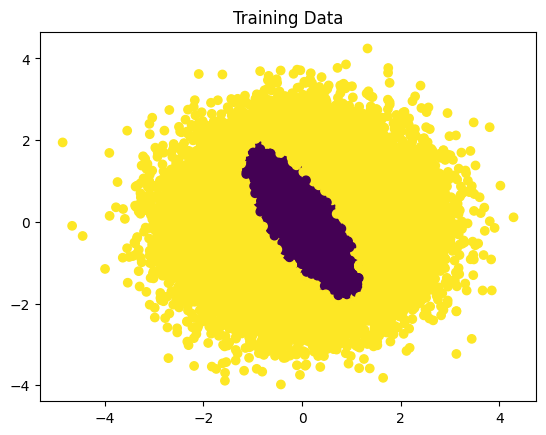

In [8]:
#plot the data
import matplotlib.pyplot as plt

plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain)
plt.title("Training Data")
plt.show()


In [34]:
xtrain

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       ...,
       [-1.48486162,  0.46215981],
       [ 1.54902516,  2.53170549],
       [-0.03572203,  0.17320019]])

In [9]:
import numpy as np

def remove_data_points_with_outliers(data, target):
    # Convert the data to a NumPy array for easier manipulation
    data_array = np.array(data)
    target_array = np.array(target)

    #data_array = data

    # Calculate the first and third quartiles and IQR for each feature
    Q1 = np.percentile(data_array, 15, axis=0)
    Q3 = np.percentile(data_array, 85, axis=0)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify rows that do not contain outliers in any feature
    non_outlier_rows = ~((data_array < lower_bound) | (data_array > upper_bound)).any(axis=1)

    # Filter and return the data
    filtered_data = data_array[non_outlier_rows]
    filtered_target = target_array[non_outlier_rows]

    # print the number of removed rows
    print(f"Number of removed rows: {len(data_array) - len(filtered_data)}")

    return filtered_data, filtered_target



In [36]:
xtrain_filtered, ytrain_filtered = remove_data_points_with_outliers(xtrain, ytrain)

Number of removed rows: 5


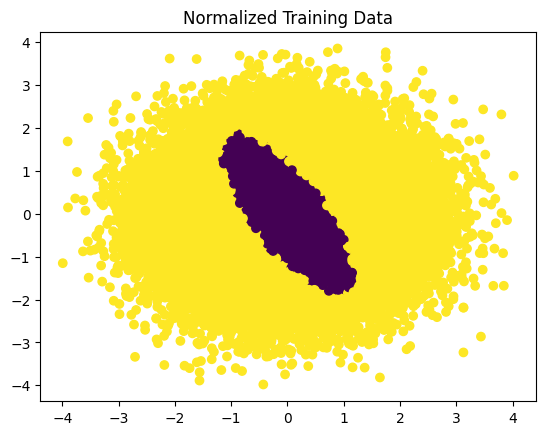

In [37]:
# plot the filtered data
plt.scatter(xtrain_filtered[:, 0], xtrain_filtered[:, 1], c=ytrain_filtered)
plt.title("Normalized Training Data")
plt.show()


In [10]:
# Example of printing sample data
def print_sample_data(data, labels, num_samples=5):
    print("Sample data:")
    for i in range(num_samples):
        print(f"Input: {data[i]}, Label: {labels[i]}")

print_sample_data(xtrain, ytrain)


Sample data:
Input: [1.76405235 0.40015721], Label: 1
Input: [0.97873798 2.2408932 ], Label: 1
Input: [ 1.86755799 -0.97727788], Label: 1
Input: [ 0.95008842 -0.15135721], Label: 1
Input: [-0.10321885  0.4105985 ], Label: 0


### Normalization

In [11]:
def min_max_normalize(data):
    # Calculate min and max for each column (feature)
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0
                      )

    # Normalize each feature
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data, min_vals, max_vals


def min_max_normalize_other(data, min_vals, max_vals):
    normalized_data = (data - min_vals) / (max_vals - min_vals)
    return normalized_data

In [16]:
# Normalize the training data
xtrain_normalized, min_vals, max_vals = min_max_normalize(xtrain)

# Normalize the validation data using the min and max values from the training data

xval_normalized = min_max_normalize_other(xval, min_vals, max_vals)

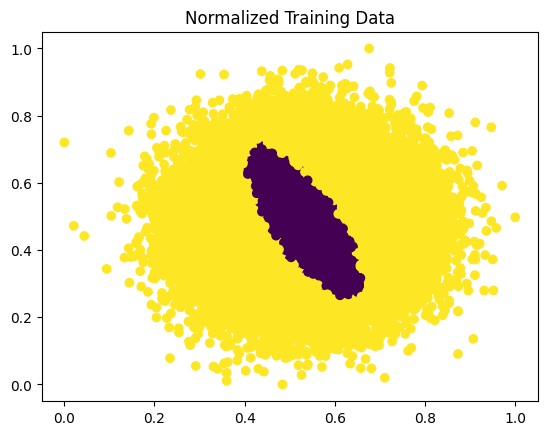

In [15]:
# plot the normalized data
plt.scatter(xtrain_normalized[:, 0], xtrain_normalized[:, 1], c=ytrain)
plt.title("Normalized Training Data")
plt.show()


### One-hot encoding

In [17]:
# convert ytrain to one-hot encoding
def one_hot_encode(data, num_cls):
    encoded_data = []
    for value in data:
        encoded_value = [0] * num_cls
        encoded_value[value] = 1
        encoded_data.append(encoded_value)
    return encoded_data

### Training

In [18]:
import random
# Set the weights to random normal values between -1 and 1 and biases to 0
w = [[random.uniform(-1, 1) for _ in range(3)] for _ in range(2)]
b = [0, 0, 0]
v = [[random.uniform(-1, 1) for _ in range(2)] for _ in range(3)]
c = [0, 0]

print(f"w: {w}")
print(f"b: {b}")
print(f"v: {v}")
print(f"c: {c}")


w: [[-0.04489573104939337, 0.5201549887464298, 0.23199808190131055], [-0.7835944533868391, 0.3929502570502741, -0.3195566505269263]]
b: [0, 0, 0]
v: [[0.2580950737009853, -0.25102672078748145], [-0.259601649176596, -0.3761224237006535], [-0.2354085226910645, 0.30507180396482325]]
c: [0, 0]


In [ ]:


synth_nn = SimpleNeuralNetwork(w, b, v, c)

synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain.tolist(), num_cls), 5, learning_rate=0.1)
synth_nn = SimpleNeuralNetwork(w, b, v, c)

synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain.tolist(), num_cls), 5, learning_rate=0.01)
synth_nn = SimpleNeuralNetwork(w, b, v, c)

synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain.tolist(), num_cls), 5, learning_rate=0.001)


### Plotting training loss

In [35]:
synth_nn = SimpleNeuralNetwork(w, b, v, c)
epochs_loss = synth_nn.train(xtrain_normalized.tolist(), one_hot_encode(ytrain.tolist(), num_cls), 100, learning_rate=0.1)

dw: [[-2.784884707971984e-07, -2.7848353572231015e-07, -2.7848353572231015e-07], [-2.049138154866813e-07, -2.0491018422316018e-07, -2.0491018422316018e-07]]
db: [-3.8463646025894163e-07, -3.8462964414288954e-07, -3.8462964414288954e-07]
dc: [0.5914365264071184, -0.5914365264071184]
dv: [[2.22426669444143e-08, -2.22426669444143e-08], [2.2242052066281736e-08, -2.2242052066281736e-08], [2.2242052066281736e-08, -2.2242052066281736e-08]]
Epoch 1, Average Loss: 0.550434508345395
Epoch 2, Average Loss: 0.5495246672657873
Epoch 3, Average Loss: 0.5486937643446136
Epoch 4, Average Loss: 0.5479309202680159
Epoch 5, Average Loss: 0.5472272350804703
Epoch 6, Average Loss: 0.5465753136990756
Epoch 7, Average Loss: 0.5459688238445143
Epoch 8, Average Loss: 0.5454018325273782
Epoch 9, Average Loss: 0.5448671127702339
Epoch 10, Average Loss: 0.5443506510210269
Epoch 11, Average Loss: 0.543812654762478
Epoch 12, Average Loss: 0.5431234000020206
Epoch 13, Average Loss: 0.5419317190302146
Epoch 14, Avera

In [ ]:
# plot nicely training loss over data points, and epochs

plt.figure(figsize=(10, 6))

for i, data_points_loss in enumerate(epochs_loss):

    # do movinga average of 10 points over the loss

    ma_loss = np.convolve(data_points_loss, np.ones(1000), 'valid') / 10
    plt.plot(ma_loss, label=f"Epoch {i + 1}")

plt.legend()

plt.title("Training Loss Over Data Points")

plt.xlabel("Data Points")

plt.ylabel("Loss")

plt.show()





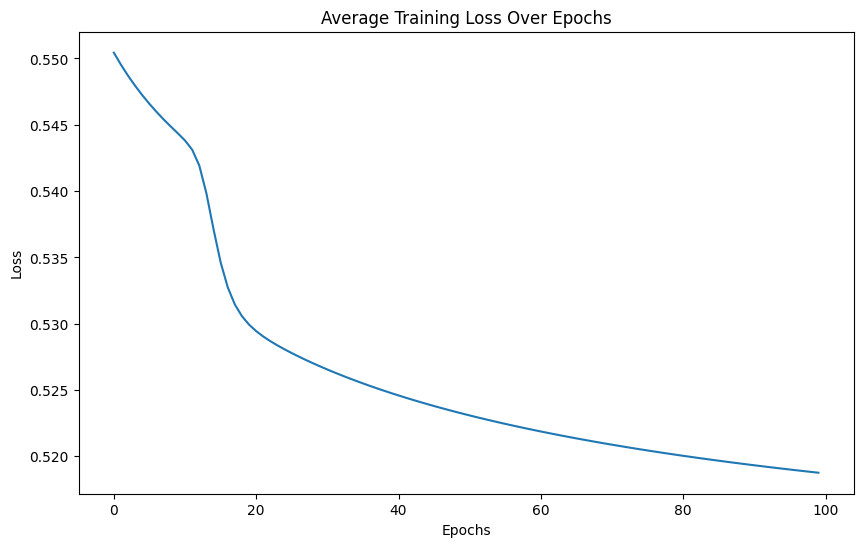

In [ ]:

plt.figure(figsize=(10, 6))

# compute mean loss of all epochs

mean_loss = np.mean(epochs_loss, axis=1)

plt.plot(mean_loss)

plt.title("Average Training Loss Over Epochs")

plt.xlabel("Epochs")

plt.ylabel("Loss")

plt.show()



    

In [47]:
len(ytrain_filtered.tolist())

59995

In [ ]:
import matplotlib.pyplot as plt

img = x_train[0,:].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show() # Show the image

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b = np.zeros(hidden_size)
        self.V = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.c = np.zeros(output_size)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        k = np.dot(X, self.W1) + self.b1
        z = self.sigmoid(self.z1)
        o = np.dot(self.a1, self.W2) + self.b2
        y = self.softmax(self.z2)
        return k, z, o, y

    def compute_loss(self, y_true, y_pred):
        logloss = -np.sum(y_true * np.log(y_pred))
        return logloss

    def backward(self, t, y, o, z, k, X):
        # derivatives with tensor backpropagation
        do = (y - t)

        # derivative of loss function with respect to v
        dv = np.dot(z.T, do)

        assert dv.shape == self.V.shape, "dv shape mismatch"

        # derivative of loss function with respect to ci
        dc = do.deepcopy()

        assert dc.shape == self.c.shape, "dc shape mismatch"

        # derivative of loss function with respect to zi
        dz = np.dot(do, self.V.T) #wrong

        assert dz.shape == z.shape, "dz shape mismatch"

        # derivative of loss function with respect to ki
        dk = dz * z * (1 - z)
        


        
        
        

       

# Example usage
nn = NeuralNetwork(input_size=784, hidden_size=300, output_size=10, learning_rate=0.01)

# Load MNIST data here

# Training loop
# for epoch in range(epochs):
#     for X_batch, y_batch in minibatches:
#         # Forward pass
#         outputs = nn.forward(X_batch)
#         # Compute loss
#         loss = nn.compute_loss(y_batch, outputs)
#         # Backward pass and update parameters
#         nn.backward(X_batch, y_batch, outputs)
